# NYC Taxi Trip Data Analysis

## Project Proposal
This project aims to analyze New York City Taxi Trip data to uncover traffic patterns and commuting trends across the city. The project will explore the following questions:
- **Peak Activity:** What are the peak hours for taxi trips?
- **Trip Duration:** How do average trip durations vary across different times of the day or days of the week?
- **Congestion Analysis:** Which routes or boroughs experience the highest congestion?
- **External Factors:** Is there any noticeable impact of weather or special events on taxi activity?

The project will involve data cleaning, exploratory data analysis, and visualization using Python libraries and will be managed via Git version control in VS Code.


In [2]:
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 29.3 MB/s eta 0:00:0000:0100:01


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns


# Set visualization style and pandas display options for clarity
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


In [22]:
try:
    df = pd.read_parquet("yellow_tripdata_2025-01.parquet")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

df.head()

Data loaded successfully.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [5]:
try:
    df1 = pd.read_parquet("fhv_tripdata_2025-01.parquet")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

df1.head()

Data loaded successfully.


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2025-01-01 00:20:00,2025-01-01 00:57:00,NaN,NaN,NaN,B00009
1,B00013,2025-01-01 00:40:00,2025-01-01 02:21:00,NaN,NaN,NaN,B00888
2,B00112,2025-01-01 00:22:59,2025-01-01 00:45:28,NaN,108.0,NaN,B00112
3,B00112,2025-01-01 00:32:57,2025-01-01 00:33:10,NaN,14.0,NaN,B00112
4,B00112,2025-01-01 00:46:48,2025-01-01 00:49:51,NaN,14.0,NaN,B00112


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06
mean,1.785428e+00,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.297859e+00,5.855126e+00,2.482535e+00,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00
std,4.263282e-01,NaN,NaN,7.507503e-01,5.646016e+02,1.163277e+01,6.452948e+01,6.940169e+01,7.013334e-01,4.634729e+02,1.861509e+00,1.374623e-01,3.779681e+00,2.002582e+00,2.781938e-01,4.636585e+02,9.039932e-01,4.725090e-01


In [24]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
                          ...  
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
Length: 19, dtype: int64

In [25]:
df.rename(columns={
    'VendorID': 'vendor_id',
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime',
    'passenger_count': 'passenger_count',
    'trip_distance': 'trip_distance',
    'RatecodeID': 'rate_code_id',
    'store_and_fwd_flag': 'store_and_forward_flag',
    'PULocationID': 'pickup_location_id',
    'DOLocationID': 'dropoff_location_id',
    'payment_type': 'payment_type',
    'fare_amount': 'fare_amount',
    'extra': 'extra',
    'mta_tax': 'mta_tax',
    'tip_amount': 'tip_amount',
    'tolls_amount': 'tolls_amount',
    'improvement_surcharge': 'improvement_surcharge',
    'total_amount': 'total_amount',
    'congestion_surcharge': 'congestion_surcharge',
    'Airport_fee': 'airport_fee'
}, inplace=True)

In [26]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_forward_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


In [29]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_day_name'] = df['pickup_datetime'].dt.day_name()


df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_forward_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_day_of_week,pickup_day_name
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0,2,Wednesday
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0,2,Wednesday
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0,2,Wednesday
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0,2,Wednesday
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0,2,Wednesday


In [30]:
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
df = df[(df['fare_amount'] <= 500) & (df['trip_duration'] <= 300)]

df.head()

/var/folders/g5/s9j4vt_n7k38gs24fcm_lpj40000gn/T/ipykernel_79996/1116711425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_forward_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_day_of_week,pickup_day_name,trip_duration
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0,2,Wednesday,8.350000
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0,2,Wednesday,2.550000
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0,2,Wednesday,1.950000
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0,2,Wednesday,5.566667
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0,2,Wednesday,3.533333


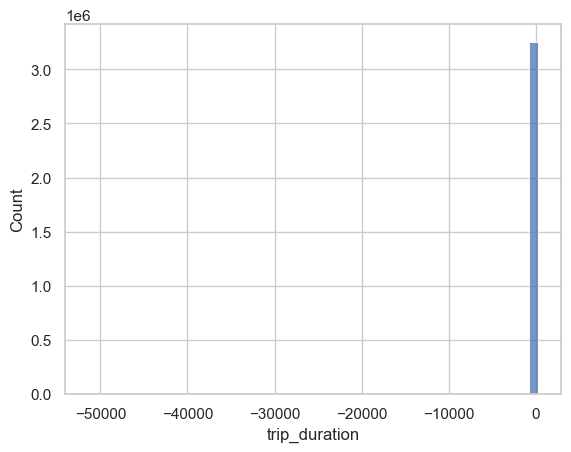

In [31]:
sns.histplot(data=df, x='trip_duration', bins=50)
plt.show()

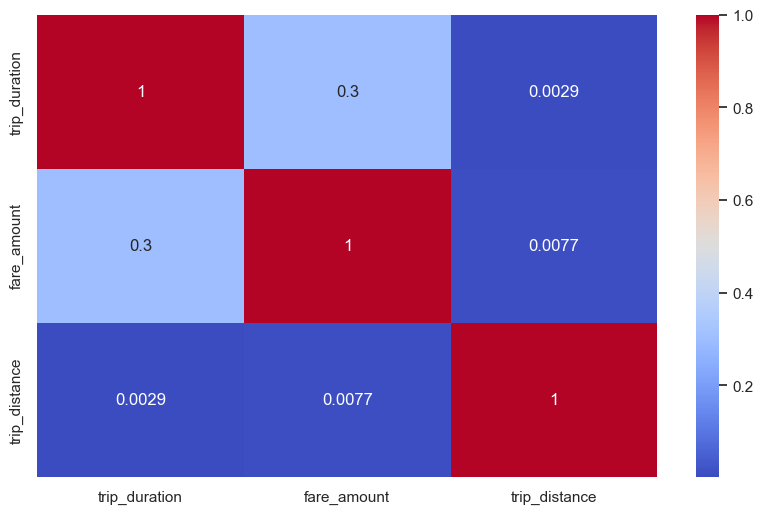

In [32]:
df[['trip_duration', 'fare_amount', 'trip_distance']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df[['trip_duration', 'fare_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm')
plt.show()

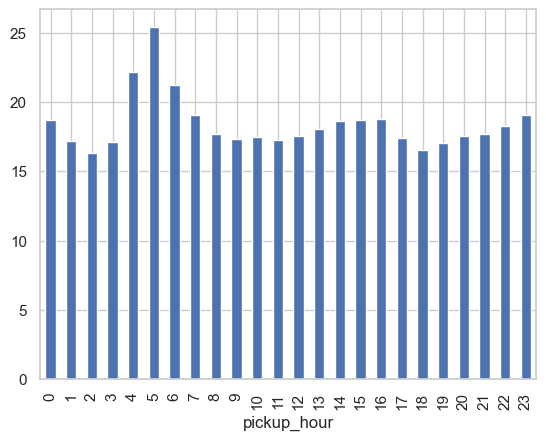

In [34]:
hour_stats = df.groupby('pickup_hour')['fare_amount'].mean()
hour_stats.plot(kind='bar')
plt.show()
